![image info](https://ineuron.ai/images/ineuron-logo.png)

## 1. Problem Statement:
- Hence, the goal is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most. Which countries should receive funding and why?

## 2. Data Collection.
- The Dataset is collected from https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data
- The data consists of 10 columns and 167 rows.

### 2.1 Import Data and Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/Country-data.csv')

#### Show Top 5 Records

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Feature Description
- country: Name of the country
- child_mort: Death of children under 5 years of age per 1000 live births
- exports: Exports of goods and services per capita. Given as %age of the GDP per capita
- health: Total health spending per capita. Given as %age of GDP per capita
- imports: Imports of goods and services per capita. Given as %age of the GDP per capita
- Income: Net income per person
- Inflation: The measurement of the annual growth rate of the Total GDP
- life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same
- gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population

#### Shape of the dataset

In [10]:
df.shape

(167, 10)

#### Check duplicates

In [9]:
#finding duplicates
print('There are {} duplicates in dataset'.format(len(df[df.duplicated()])))

There are 0 duplicates in dataset


#### Summary of the dataset

- The described method will help to see how data has been spread for numerical values.
- We can clearly see the minimum value, mean values, different percentile values, and maximum values.

In [11]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Check Datatypes in the dataset
#### info() is used to check the Information about the data and the datatypes of each respective attribute

In [13]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### Insights
- Most of the data is numerical, As data has 1 object and 9 numeric feature.
- There are no missing values

In [15]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

We have 1 categorical features : ['country']


### Univariate Analysis
- The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.
-Other Type of Analysis are
    - Bivariate Analysis: The analysis of two variables.
    - Multivariate Analysis: The analysis of two or more variables.

/Users/admin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/admin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/admin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/admin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

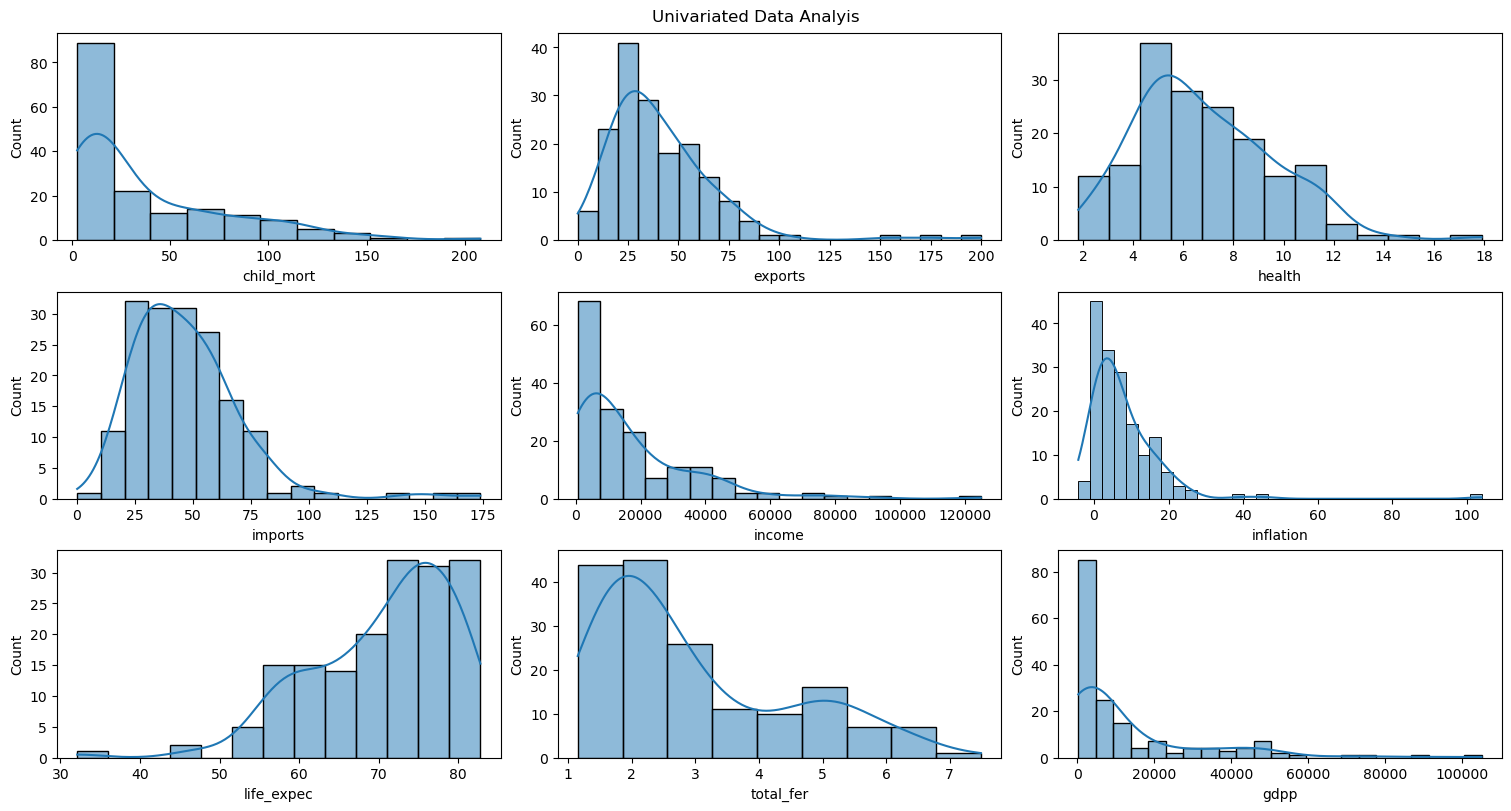

In [25]:
# colors=['red','black','blue']

fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
plt.suptitle("Univariated Data Analyis")
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.histplot(df[i], ax=ax[x], kde=True)

#### Insights
- Histograms clearly shows that the numerical features are continous or discreate values.
- There are no features with categorical values

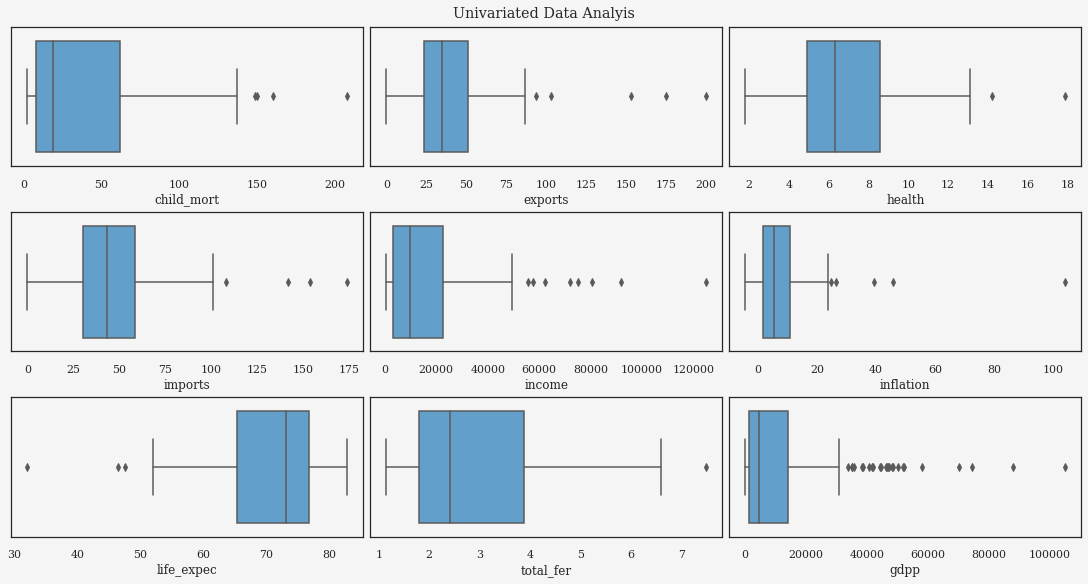

In [6]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
plt.suptitle("Univariated Data Analyis")
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(x=df[i], ax=ax[x], color=colors[2])

#### Insights
- Box plot shows us there are clear outliers in child_mort, exports, imports, income, gdpp features. 
- Outliers can point to countries that are in critical conditions and may need help.

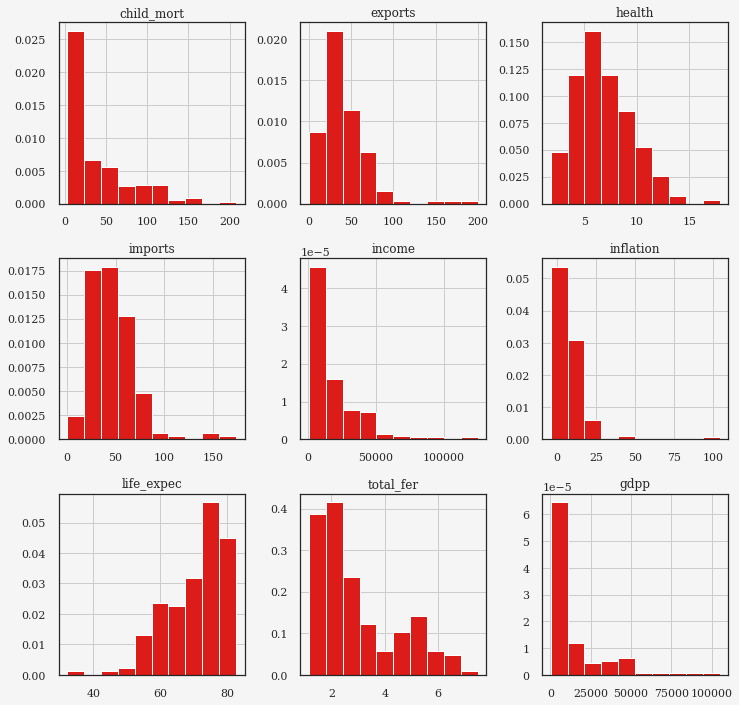

In [7]:
df.hist(density=True, figsize=(12,12))
plt.show()

In [28]:
df.child_mort

0       90.2
1       16.6
2       27.3
3      119.0
4       10.3
       ...  
162     29.2
163     17.1
164     23.3
165     56.3
166     83.1
Name: child_mort, Length: 167, dtype: float64

#### Insights
- We can see that there are some features that do indeed have outliers
- We will not remove outliers, As they could be considered vary informative. 

#### Correlation Heatmap

<AxesSubplot:>

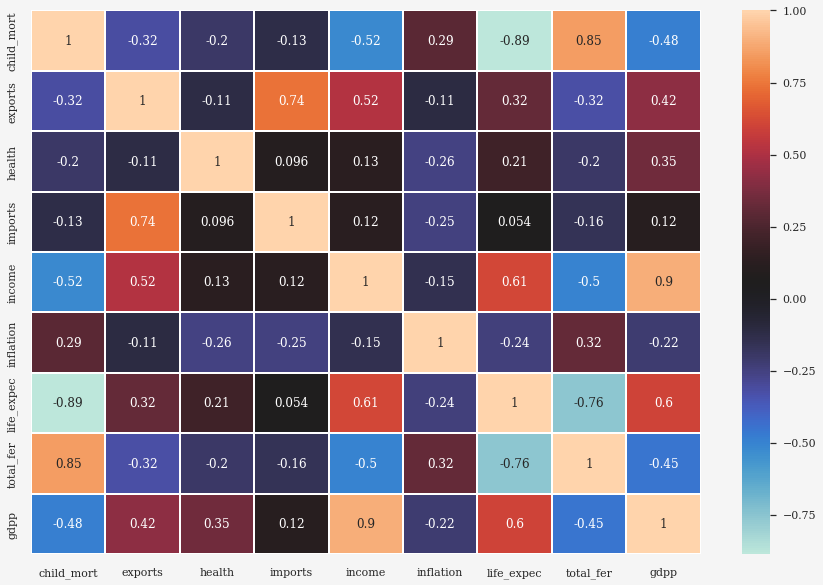

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='icefire',linewidths=0.2) #data.corr()-->correlation matrix

#### Insights
- life_expect has high correlation with child mortality(-0.89)
- total_fertility due to high correlation with child mortality(+0.85)
- imports due to high correlation with exports(+0.74)
- income due to high correlation with gdpp(+0.9)
- GDPP has fairly high positive correlation with Life Expectancy (+0.60)

#### Pair Plot

/Users/admin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/admin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/admin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/admin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

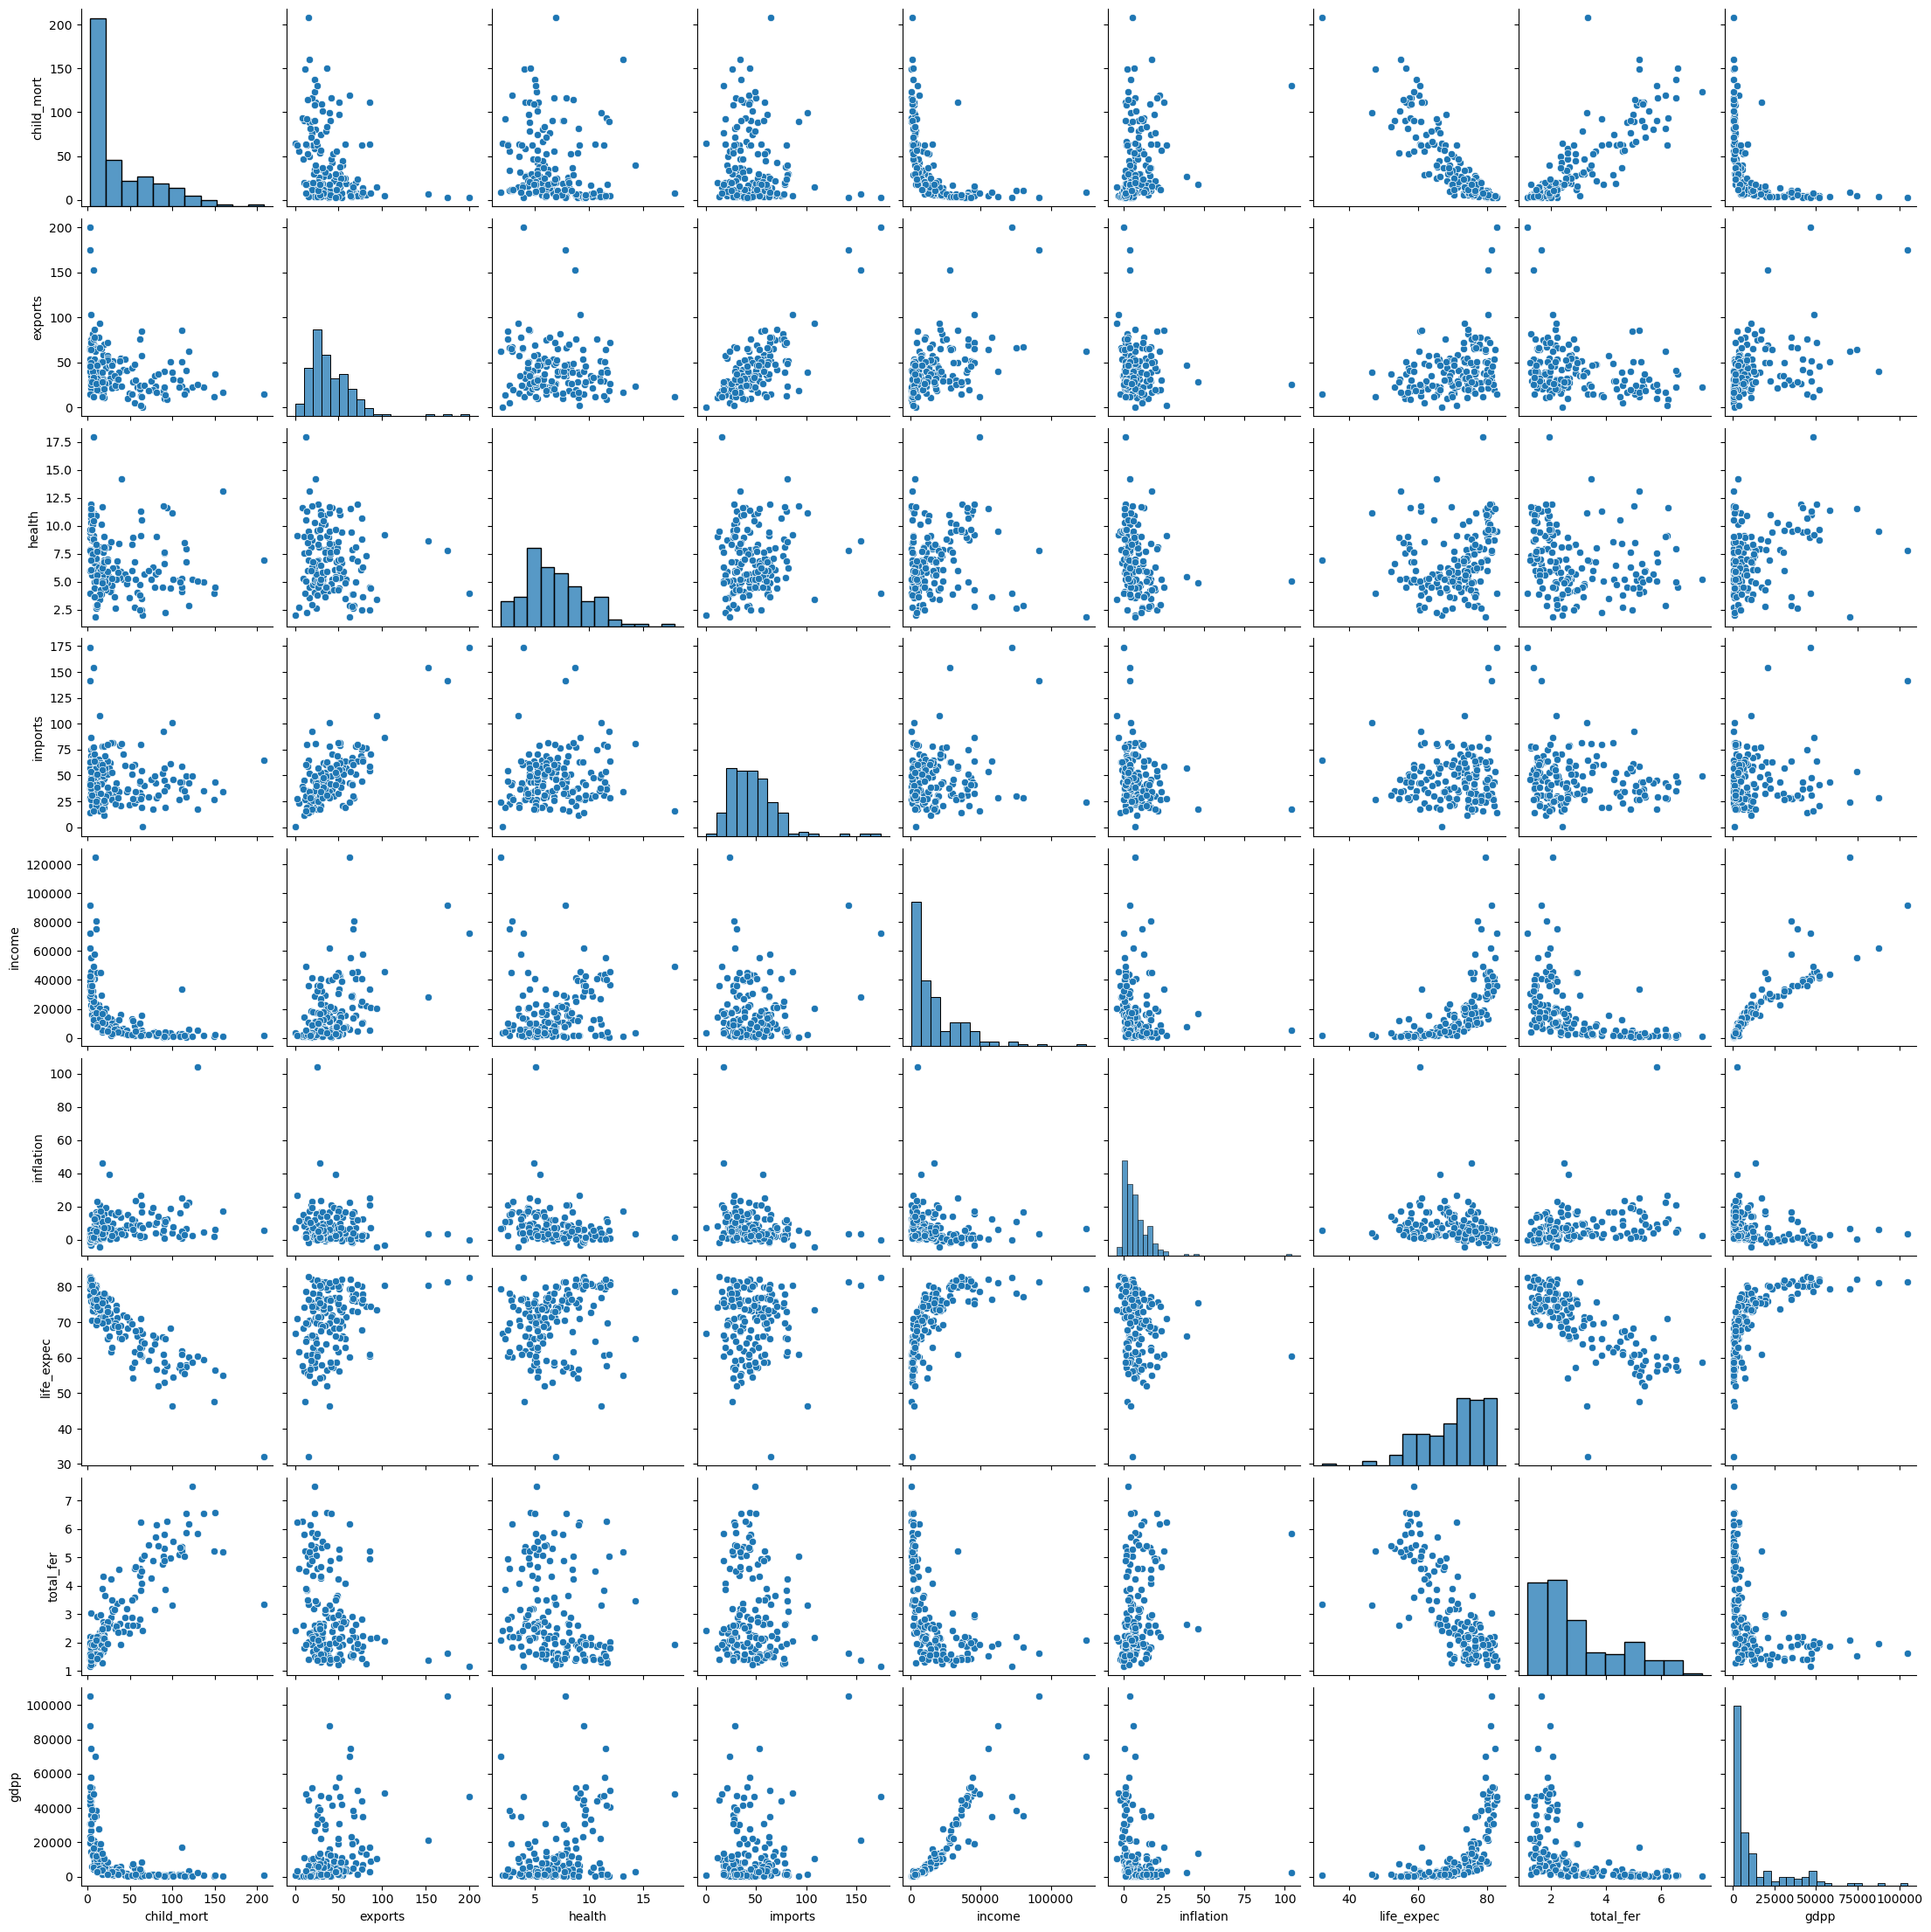

In [31]:
sns.pairplot(df, diag_kind="hist",  markers=["o", "s", "D"])

#### Insights
- Child_mort has negative relationship with GDP as the child mortality is less the GDP also increases and vice versa.
- Export and Incomehas clear postivite relationship with GDP.
- Total_fer and child_mort has postive relationship.
- total_fer and life_expec has negative relationship.
- life_expec and childe_mort has negative relationship.